In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,r2_score,mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams['figure.dpi']=100

#### Read the dataset

In [2]:
df=pd.read_csv("Fraud_check.csv")

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


#### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df.duplicated().sum()

0

#### converting the categorical column into numerical using get dummies

In [7]:
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


#### as per the problem statement treat those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [8]:
condition = df.iloc[:,0] <= 30000
df['Taxable.Income']=np.where(condition,'Risky','Good')

In [9]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,Good,50047,10,0,0,1,1
1,Good,134075,18,1,0,0,1
2,Good,160205,30,0,1,0,1
3,Good,193264,15,1,0,1,1
4,Good,27533,28,0,1,0,0


In [10]:
df['Taxable.Income']=df['Taxable.Income'].map({'Risky':0,'Good':1})

In [11]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,1,50047,10,0,0,1,1
1,1,134075,18,1,0,0,1
2,1,160205,30,0,1,0,1
3,1,193264,15,1,0,1,1
4,1,27533,28,0,1,0,0


#### Visualization

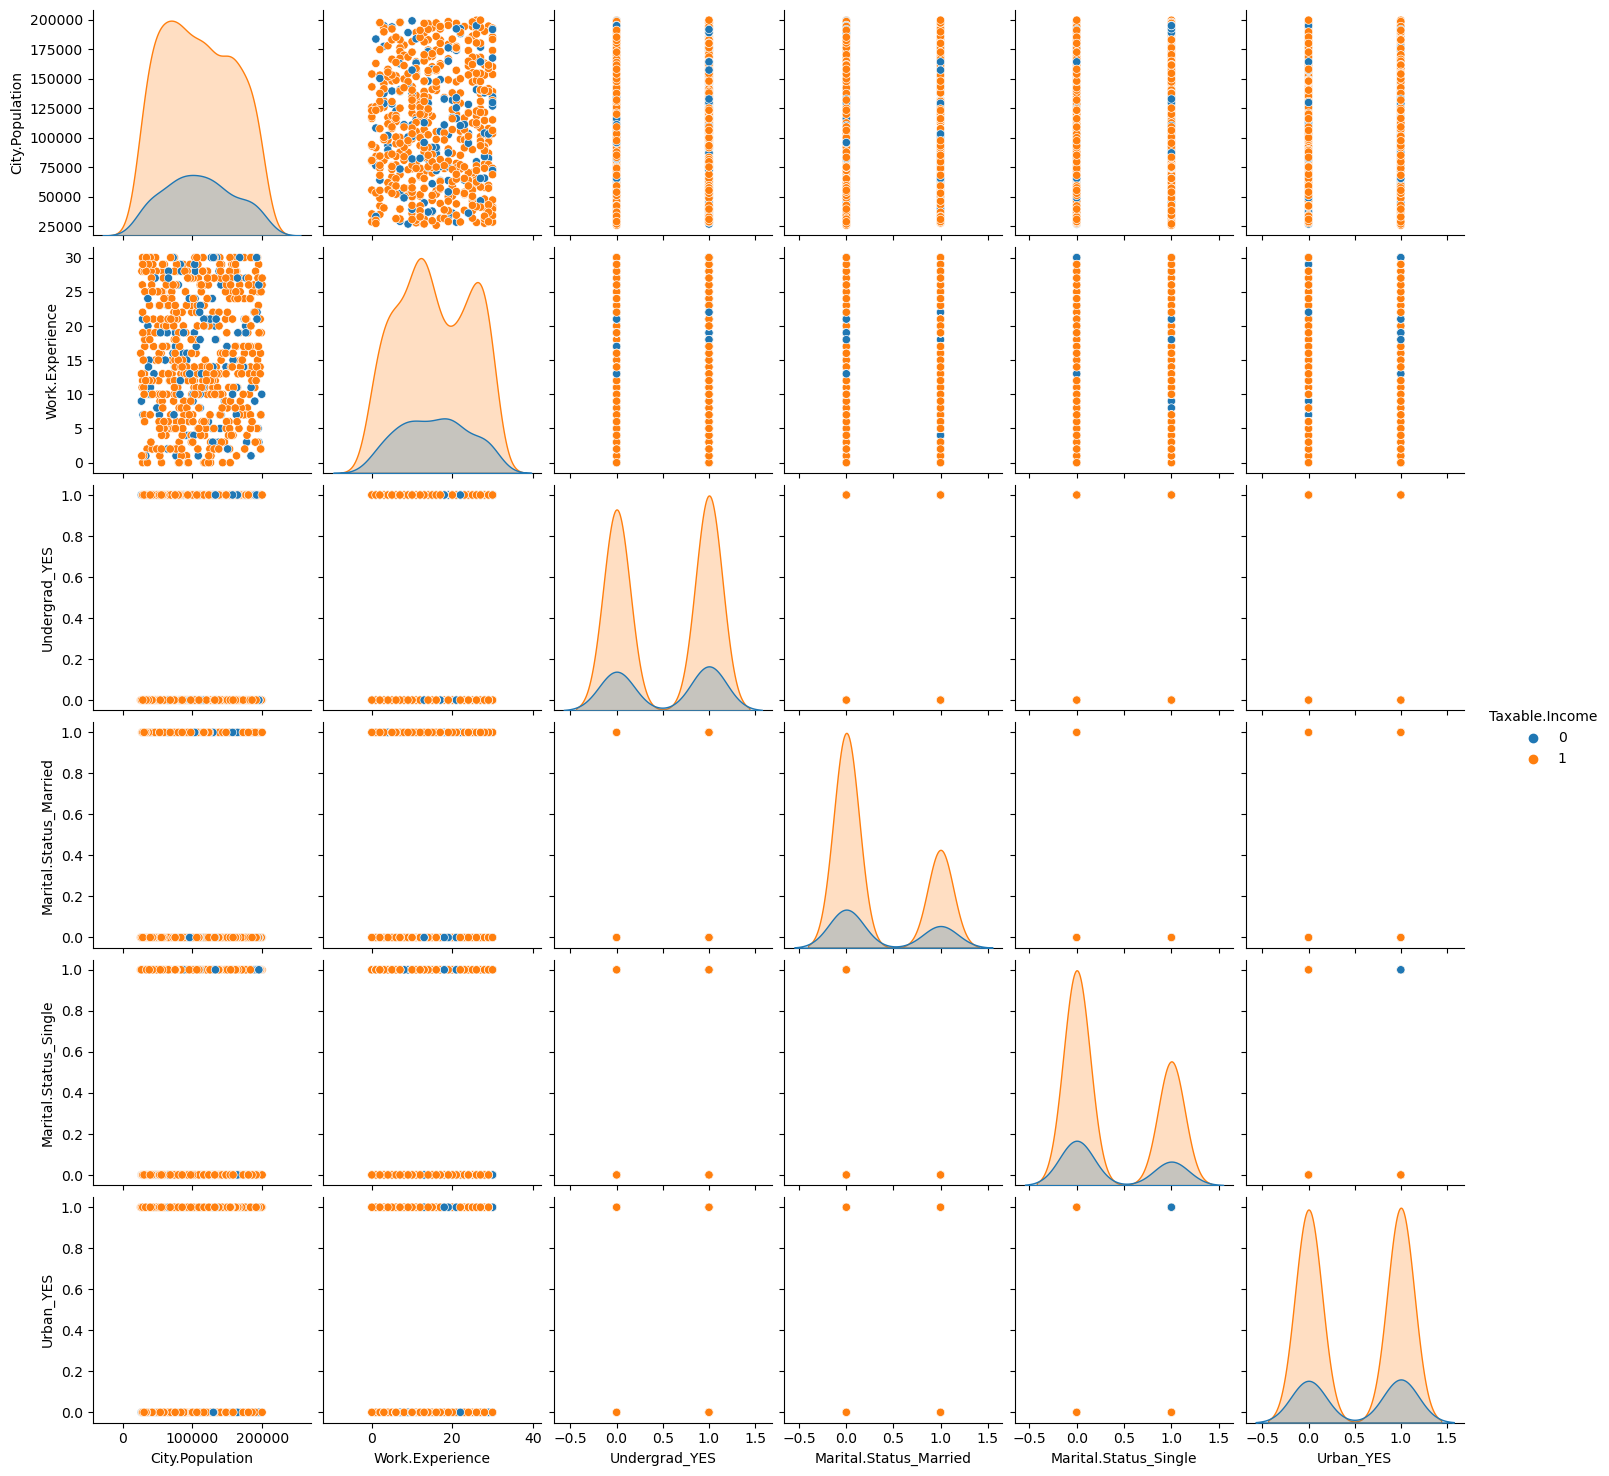

In [12]:
sns.pairplot(data=df, hue = 'Taxable.Income')

<Axes: xlabel='Taxable.Income', ylabel='count'>

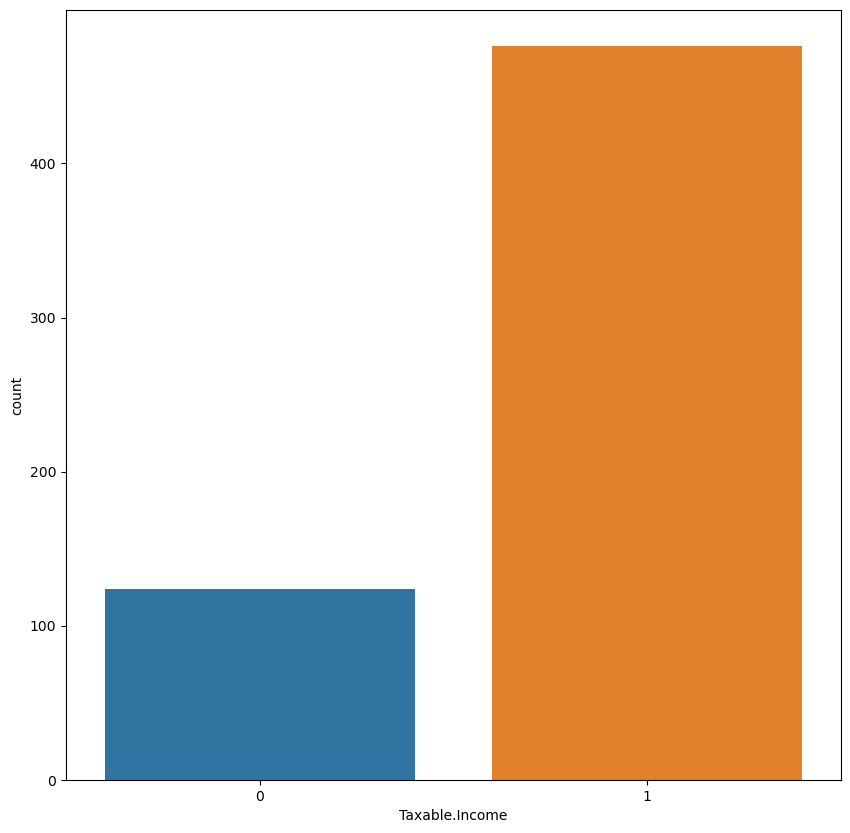

In [13]:
sns.countplot(x=df['Taxable.Income'])

In [14]:
# so as we can see through the countplot there are only near to 120 are risky record while the good are more than 400

#### splitting the data into training and testing part

In [15]:
x=df.iloc[:,1:]
y=df['Taxable.Income']

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [17]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)

In [18]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.78      0.94      0.85       119

    accuracy                           0.75       150
   macro avg       0.39      0.47      0.43       150
weighted avg       0.62      0.75      0.68       150



In [19]:
print(rfc.score(xtrain,ytrain))
print(rfc.score(xtest,ytest))

1.0
0.7466666666666667


In [20]:
# so there is overfitted model here

#### HyperParameter Tuning

In [21]:
rfc=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=5)
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)

In [22]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.79      1.00      0.88       119

    accuracy                           0.79       150
   macro avg       0.40      0.50      0.44       150
weighted avg       0.63      0.79      0.70       150



In [23]:
print(rfc.score(xtrain,ytrain))
print(rfc.score(xtest,ytest))

0.7933333333333333
0.7933333333333333


#### now after doing the hyperparameter tuning we get the generilized mode